In [61]:
%pip install zss
%pip install lxml
%pip install pandas
%pip install seaborn
%pip install -U sentence-transformers
%pip install gensim
%pip install levenshtein

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 3.4 MB/s eta 0:00:000:00:01
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 2.3.1
    Uninstalling sentence-transformers-2.3.1:
      Successfully uninstalled sentence-transformers-2.3.1

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 2.3 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.9 MB/s eta 0:00:000:00:010:00:01:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [93]:
import xml.etree.ElementTree as ET
from zss import simple_distance, distance, Node
import zss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import gensim.downloader as api
dataset = api.load("text8")
import pickle

In [2]:

A = (
    Node("f")
        .addkid(Node("a")
            .addkid(Node("h"))
            .addkid(Node("c")
                .addkid(Node("l"))))
        .addkid(Node("e"))
    )
B = (
    Node("f")
        .addkid(Node("a")
            .addkid(Node("d"))
            .addkid(Node("c")
                .addkid(Node("b"))))
        .addkid(Node("e"))
    )

In [3]:
print(simple_distance(A, B, return_operations=True))

(2.0, [<Operation Update>, <Operation Update>, <Operation Match>, <Operation Match>, <Operation Match>, <Operation Match>])


In [4]:
tree = ET.parse("data/AT1/ICS2-01.xml")
# with open("data/AT1/ICS2-01.xml", "r") as f:
#     data = f.read()
root = tree.getroot()[0]
print(root.attrib["refinement"])
print(root[0].text)
print(root[1:len(root)])
print(len(root))

disjunctive
Gathering personal data
[<Element 'node' at 0x28249abb0>, <Element 'node' at 0x28249b100>, <Element 'node' at 0x28249b330>]
4


In [5]:
def xmlToZSSTree(file):
    tree = ET.parse(file)
    root = tree.getroot()[0]
    ZSSTree = XMLZSSNode(root)
    return ZSSTree
    # attribute = root.attrib["refinement"]
    # label = root[0].text
    # children = root[1:len(root)]
    # for i in children:
    #     print(i[0].text)
    #     print(i.attrib["refinement"])
    


    
    
def XMLZSSNode(node):
    label = node[0].text
    # print(label)
    refinement = node.attrib["refinement"]
    children = []
    if len(node) > 1:
        xml_children = node[1:len(node)]
        for i in xml_children:
            children.append(XMLZSSNode(i))
    return Node(label, children)
    
    

    

<Axes: >

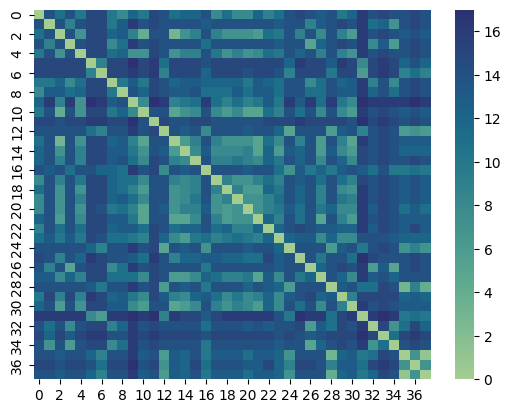

In [6]:


data = []
for i in range(1, 39):
    temp = []
    for j in range(1, 39):
        if i < 10:
            i = "0" + str(i)
        if j < 10:
            j = "0" + str(j)
        T1 = xmlToZSSTree("data/AT1/ICS2-"+str(i)+".xml")
        T2 = xmlToZSSTree("data/AT1/ICS2-"+str(j)+".xml")
        dist = simple_distance(T1, T2)#, return_operations=True))
        temp.append(dist)
        # print(i, j, dist)
        i = int(i)
        j = int(j)
    data.append(temp)

simple_df = pd.DataFrame(data)
# print(simple_df)        

sns.heatmap(simple_df, annot=False, cmap="crest")

# print(T1, T2)
# print(simple_distance(T1, T2, return_operations=True))

## Simple Distance

12.339971550497866


<Axes: >

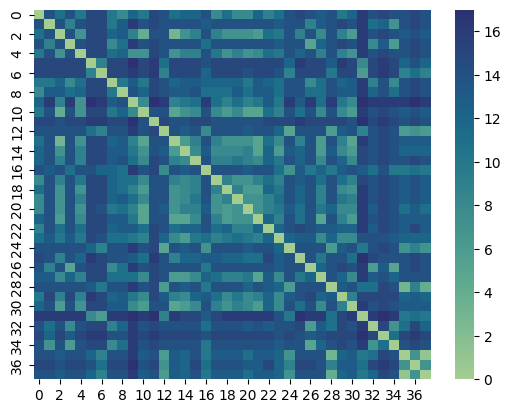

In [33]:
def insert(a):
    return 1
def remove(a):
    return 1
def update(a, b):
    if a == b:
        return 0
    else:
        return 1


data = []
unique = []
for i in range(1, 39):
    temp = []
    for j in range(1, 39):
        if i < 10:
            i = "0" + str(i)
        if j < 10:
            j = "0" + str(j)
        T1 = xmlToZSSTree("data/AT1/ICS2-"+str(i)+".xml")
        T2 = xmlToZSSTree("data/AT1/ICS2-"+str(j)+".xml")
        dist = distance(T1, T2, Node.get_children, insert, remove, update)
        temp.append(dist)
        if int(i) < int(j):
            unique.append(dist)
        # print(i, j, dist)
        i = int(i)
        j = int(j)
    data.append(temp)

simple_df = pd.DataFrame(data)
# print(simple_df)        

print(sum(unique)/len(unique))
sns.heatmap(simple_df, annot=False, cmap="crest")

## Structual Only

Nodes can be updated at no cost - so the only cost is with adding and subtracting nodes. Hence this is a comparison of construction.

0.9630156472261735


<Axes: >

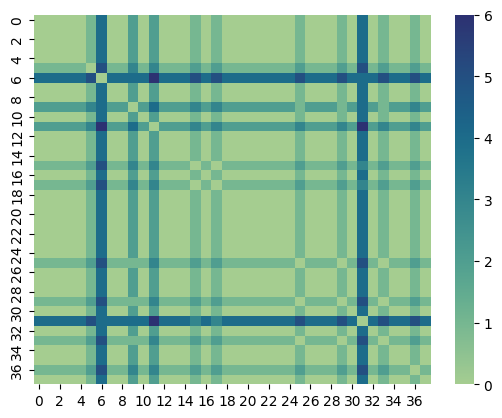

In [94]:
def insert(a):
    return 1
def remove(a):
    return 1
def update(a, b):
    return 0
    if a == b:
        return 0
    else:
        return 1


data = []
unique = []
for i in range(1, 39):
    temp = []
    for j in range(1, 39):
        if i < 10:
            i = "0" + str(i)
        if j < 10:
            j = "0" + str(j)
        T1 = xmlToZSSTree("data/AT1/ICS2-"+str(i)+".xml")
        T2 = xmlToZSSTree("data/AT1/ICS2-"+str(j)+".xml")
        dist = distance(T1, T2, Node.get_children, insert, remove, update)
        temp.append(dist)
        if int(i) < int(j):
            unique.append(dist)
        # print(i, j, dist)
        i = int(i)
        j = int(j)
    data.append(temp)

simple_df = pd.DataFrame(data)
# print(simple_df)        

print(sum(unique)/len(unique))
sns.heatmap(simple_df, annot=False, cmap="crest")

0.9630156472261735


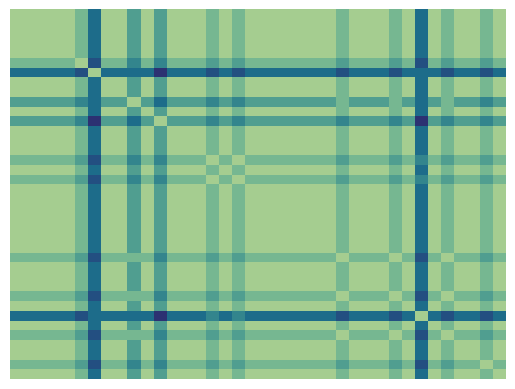

In [61]:
def insert(a):
    return 1
def remove(a):
    return 1
def update(a, b):
    return 0


data = []
unique = []
for i in range(1, 39):
    temp = []
    for j in range(1, 39):
        if i < 10:
            i = "0" + str(i)
        if j < 10:
            j = "0" + str(j)
        T1 = xmlToZSSTree("data/AT1/ICS2-"+str(i)+".xml")
        T2 = xmlToZSSTree("data/AT1/ICS2-"+str(j)+".xml")
        dist = distance(T1, T2, Node.get_children, insert, remove, update)
        temp.append(dist)
        if int(i) < int(j):
            unique.append(dist)
        # print(i, j, dist)
        i = int(i)
        j = int(j)
    data.append(temp)

print(sum(unique)/len(unique))
simple_df = pd.DataFrame(data)
# print(simple_df)        


ax = sns.heatmap(simple_df, annot=False, cmap="crest",  yticklabels=False,  xticklabels=False, cbar=False)
ax.tick_params(left=False, bottom=False)
plt.savefig("img/test.png")

In [ ]:
# data = [i for i in dataset]
# def tagged_document(list_of_list_of_words):
#    for i, list_of_words in enumerate(list_of_list_of_words):
#       yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])
 
# training_data = list(tagged_document(data))
# model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
 
# model.build_vocab(training_data)
# model.train(training_data, total_examples=model.corpus_count, epochs=model.epochs)

In [43]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

config_sentence_transformers.json: 100%|█████████████████████████████████████████████████████████████| 122/122 [00:00<00:00, 408kB/s]
README.md: 100%|████████████████████████████████████████████████████████████████████████████████| 4.12k/4.12k [00:00<00:00, 5.73MB/s]
sentence_bert_config.json: 100%|███████████████████████████████████████████████████████████████████| 53.0/53.0 [00:00<00:00, 265kB/s]
config.json: 100%|██████████████████████████████████████████████████████████████████████████████████| 645/645 [00:00<00:00, 1.81MB/s]
pytorch_model.bin: 100%|██████████████████████████████████████████████████████████████████████████| 471M/471M [00:18<00:00, 25.7MB/s]
tokenizer_config.json: 100%|████████████████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 3.81MB/s]
tokenizer.json: 100%|███████████████████████████████████████████████████████████████████████████| 9.08M/9.08M [00:00<00:00, 27.1MB/s]
1_Pooling/config.json: 100%|██████████████████████████████████

In [58]:

sentences = [
    'what is the weather tomorrow',
    'will it rain tomorrow',
]
embedding = model.encode(sentences, convert_to_tensor=False)
embedding.shape
cosine_scores = util.cos_sim(embedding, embedding)
print(cosine_scores)
print(float(cosine_scores[0][1]))

d = {}
for i, v1 in enumerate(sentences):
    for j, v2 in enumerate(sentences):
        if i >= j:
            continue
        d[v1 + ' vs. ' + v2] = cosine_scores[i][j].item()

# sort by score
d_sorted = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
d_sorted


tensor([[1.0000, 0.8253],
        [0.8253, 1.0000]])
0.8252906203269958


{'what is the weather tomorrow vs. will it rain tomorrow': 0.8252906203269958}

In [97]:
from math import sqrt, pow, exp
 
def squared_sum(x):
  """ return 3 rounded square rooted value """
 
  return round(sqrt(sum([a*a for a in x])),3)
 
def euclidean_distance(x,y):
  """ return euclidean distance between two lists """
 
  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

def cos_similarity(x,y):
  """ return cosine similarity between two lists """
 
  numerator = sum(a*b for a,b in zip(x,y))
  denominator = squared_sum(x)*squared_sum(y)
  return round(numerator/float(denominator),3)

def compare(a, b):
    embedding = model.encode([a,b], convert_to_tensor=False)
    cosine_scores = util.cos_sim(embedding, embedding)
    print(a, b, round(float(float(cosine_scores[0][1])),4))
    return round(float(float(cosine_scores[0][1])),4)
    # vectors = [model.infer_vector([word for word in sent]).reshape(1,-1) for sent in [a, b]]
    # # print(vectors[0])
    # return cos_similarity(vectors[0][0],vectors[1][0])

def stored_compare(a, b):
    if a in store:
        if b in store[a]:
            return store[a][b]
        else:
            embedding = model.encode([a,b], convert_to_tensor=False)
            cosine_scores = util.cos_sim(embedding, embedding)
            store[a][b] =  round(float(float(cosine_scores[0][1])),4)
            return store[a][b]    
    else:
        store[a] = {}
        embedding = model.encode([a,b], convert_to_tensor=False)
        cosine_scores = util.cos_sim(embedding, embedding)
        store[a][b] =  round(float(float(cosine_scores[0][1])),4)
        return store[a][b]
    

In [102]:
# vectors = [model.infer_vector([word for word in sent]).reshape(1,-1) for sent in sentences]

# similarity = []
# for i in range(len(sentences)):
#    row = []
#    for j in range(len(sentences)):
#         # print(vectors[i])
#         row.append(cos_similarity(vectors[i][0],vectors[j][0]))
#    similarity.append(row)
# print(sentences)
# print(similarity)
# create_heatmap(similarity)

store

{'Social engineering': {'Social engineering': 1.0,
  'Stealing phone': 0.1136,
  'Remote access': 0.154,
  'Accessing the profile': 0.1567,
  'Request for additional data': 0.1454,
  'User profiling': 0.2114,
  'Credential creep': 0.2974,
  'Linking the dataset': 0.0965,
  'Obtaining a sensitive dataset': 0.2081,
  'Background data attack': 0.0937,
  'Malware': 0.2726,
  'Gaining user credentials': 0.165,
  'Unauthorized access to profile': 0.1104,
  'Gathering personal data': 0.2231,
  'Social Engineering Attack': 0.8413,
  'Remote Access': 0.1489,
  'Steal Phone': 0.1162,
  'Access Profile': 0.1902,
  'Request for Verification': 0.1225,
  'Obtain Sensitive Dataset': 0.1949,
  'Background Data Attack': 0.1019,
  'User Profiling': 0.2087,
  'Request Additional Data': 0.1909,
  'Credential Creep': 0.2725,
  'Malware Attack': 0.2391,
  'Gain User Credentials': 0.1407,
  'Unauthorized Profile Access': 0.1308,
  'Obtain Personal Data': 0.1915,
  'Social engineering attack': 0.8545,
  'Stea

In [114]:
import time

lims = []
for i in range(0,10):
    # lims.append(round(.1*i,4))
    for j in range(0,100):
        lims.append(round(.1*i+.001*j, 4))
lims.append(1)
# lims.extend([round(.9 + .01*i, 4) for i in range(0, 7)])
# lims.extend([round(.96 + .001*i, 4) for i in range(0, 10)])
# lims.extend([round(.97 + .001*i, 4) for i in range(0, 10)])
# lims.extend([round(.98 + .001*i, 4) for i in range(0, 10)])
# lims.extend([round(.99 + .001*i, 4) for i in range(0, 10)])
# lims.append(1)

def insert(a):
    return 1
def remove(a):
    return 1
lim = .9
def update(a, b):
    if stored_compare(a.label, b.label) >= lim:
        return 0
    else:
        return 1



all_data3 = []
for k in lims:
    start = time.time()
    # lim = .90 + .01*k
    lim = k
    # print(lim)
    data = []
    unique = []
    for i in range(1, 39):
        temp = []
        for j in range(1, 39):
            if k == lims[0]:
                print("Processing: ", i, " & ",j)
            if i < 10:
                i = "0" + str(i)
            if j < 10:
                j = "0" + str(j)
            T1 = xmlToZSSTree("data/AT1/ICS2-"+str(i)+".xml")
            T2 = xmlToZSSTree("data/AT1/ICS2-"+str(j)+".xml")
            dist = distance(T1, T2, Node.get_children, insert, remove, update)
            temp.append(dist)
            if int(i) < int(j):
                unique.append(dist)
            # print(i, j, dist)
            i = int(i)
            j = int(j)
        data.append(temp)  
    end = time.time()
    print(lim, end - start, sum(unique)/len(unique))
    simple_df = pd.DataFrame(data)
    all_data3.append((lim, simple_df))
    # ax = sns.heatmap(simple_df, annot=False, cmap="crest",  yticklabels=False,  xticklabels=False, cbar=False)
    # ax.tick_params(left=False, bottom=False)
    # plt.savefig("img/sim_dist_heatmaps/lim-"+str(lim)+".png")
with open(str(len(lims)) + 'lims_v3', 'wb') as fp:
    pickle.dump(all_data3, fp) 


# sns.heatmap(simple_df, annot=False, cmap="crest")

Processing:  1  &  1
Processing:  1  &  2
Processing:  1  &  3
Processing:  1  &  4
Processing:  1  &  5
Processing:  1  &  6
Processing:  1  &  7
Processing:  1  &  8
Processing:  1  &  9
Processing:  1  &  10
Processing:  1  &  11
Processing:  1  &  12
Processing:  1  &  13
Processing:  1  &  14
Processing:  1  &  15
Processing:  1  &  16
Processing:  1  &  17
Processing:  1  &  18
Processing:  1  &  19
Processing:  1  &  20
Processing:  1  &  21
Processing:  1  &  22
Processing:  1  &  23
Processing:  1  &  24
Processing:  1  &  25
Processing:  1  &  26
Processing:  1  &  27
Processing:  1  &  28
Processing:  1  &  29
Processing:  1  &  30
Processing:  1  &  31
Processing:  1  &  32
Processing:  1  &  33
Processing:  1  &  34
Processing:  1  &  35
Processing:  1  &  36
Processing:  1  &  37
Processing:  1  &  38
Processing:  2  &  1
Processing:  2  &  2
Processing:  2  &  3
Processing:  2  &  4
Processing:  2  &  5
Processing:  2  &  6
Processing:  2  &  7
Processing:  2  &  8
Proce

In [108]:
# with open('lim991-999', 'wb') as fp:
#     pickle.dump(all_data, fp)
print(lims)

[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108, 0.109, 0.11, 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.118, 0.119, 0.12, 0.121, 0.122, 0.123, 0.124, 0.125, 0.126, 0.127, 0.128, 0.129, 0.13, 0.131, 0.132, 0.133, 0.134, 0.135, 0.136, 0.137, 0.138, 0.139, 0.14, 0.141, 0.142, 0.143, 0.144, 0

In [82]:
lims = []
for i in range(0,10):
    # lims.append(round(.1*i,4))
    for j in range(0,10):
        lims.append(round(.1*i+.01*j, 4))
    
# lims.extend([round(.9 + .01*i, 4) for i in range(0, 7)])
# lims.extend([round(.96 + .001*i, 4) for i in range(0, 10)])
# lims.extend([round(.97 + .001*i, 4) for i in range(0, 10)])
# lims.extend([round(.98 + .001*i, 4) for i in range(0, 10)])
# lims.extend([round(.99 + .001*i, 4) for i in range(0, 10)])
lims.append(1)
print(lims)
print(len(lims))

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]
101


In [7]:
with open('lim991-999', 'rb') as fp:
    print(pickle.load(fp))

NameError: name 'pickle' is not defined

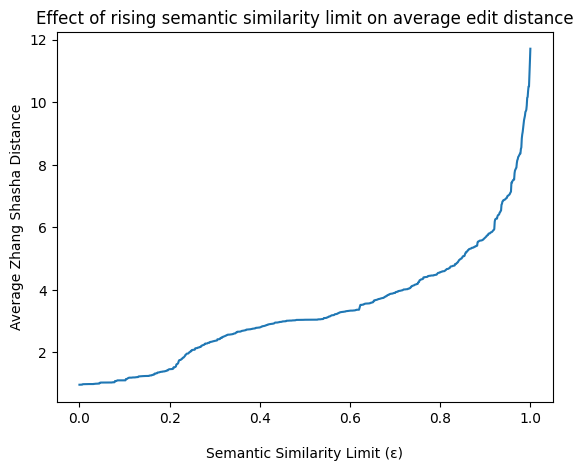

In [115]:
# with open('lim991-999', 'rb') as fp:
#     thedata = pickle.load(fp)
# with open('lim90-1', 'rb') as fp:
#     thedata2 = pickle.load(fp)
# thedata.extend(thedata2)
# print(len(thedata))

with open('1001lims_v3', 'rb') as fp:
    thedata = pickle.load(fp)


def extractUnique(tdf):
    # print(df)
    toRet = []
    for i in range(len(tdf)):
        for j in range(i, len(tdf[i])):
            # print(i, j)
            toRet.append(tdf[i][j])
    return toRet


tracker = []
skip1 = True
for k in range(len(thedata)):
    unique = extractUnique(pd.DataFrame(thedata[k][1]))
    # tracker.append((thedata[k][0], min(unique)))
    if thedata[k][0] == .96 and skip1:
        skip1 = False
        continue
    tracker.append((thedata[k][0], sum(unique)/len(unique)))
    # tracker.append((thedata[k][0], max(unique)))
# # print(tracker)
# ordered = []
# ordered.extend(tracker[9:18])
# ordered.extend(tracker[0:9])
# ordered.append(tracker[18])
# # print(ordered)

# print(tracker)
tdf = pd.DataFrame(tracker)
tdf.columns = ["limit", "average distance"]
# for i in range(0, len(tdf["limit"])):
#     if len(str(tdf["limit"][i])) == 3:
#         tdf["limit"][i] = str(tdf["limit"][i]) + "00"
#     if len(str(tdf["limit"][i])) == 4:
#         tdf["limit"][i] = str(tdf["limit"][i]) + "0"
        # print(i)
        
# print(tdf)

# sns.barplot(tdf, x="limit", y ="average distance", err_kws={"linewidth":.5})
sns.lineplot(tdf, x="limit", y ="average distance")
plt.xlabel("\nSemantic Similarity Limit (ε)")
plt.ylabel("Average Zhang Shasha Distance")
# plt.xticks(fontsize=8, rotation=90)
plt.title("Effect of rising semantic similarity limit on average edit distance")    

plt.savefig("img/similaritylimits2.pdf", bbox_inches='tight')

In [92]:
import Levenshtein

Levenshtein.distance("lewenstein", "levenshtein")

def lvs(a, b):
    print(compare(a, b), Levenshtein.distance(a,b))

lvs("obtain personal data", "obtain personnel")
lvs("obtain personal data", "gather private info")
lvs("break open safe", "break open door")
lvs("break open safe", "crack safe open")
lvs("crack safe", "crack door")
lvs("door open", "open door")
# print(compare("obtain personal data", "obtain personnel"))

obtain personal data obtain personnel 0.4507
0.4507 7
obtain personal data gather private info 0.5521
0.5521 15
break open safe break open door 0.7855
0.7855 4
break open safe crack safe open 0.814
0.814 11
crack safe crack door 0.6692
0.6692 4
door open open door 0.992
0.992 8
